## 1.단답형 예시문제
- 여러 명의 사용자들이 컴퓨터에 저장된 많은 자료들을 쉽고 빠르게 조회, 추가, 수정, 삭제할 수 있도록 해주는 소프트웨어는 무엇인가?

In [ ]:
DBMS

## 2.작업형 1 예시문제
mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소 최대 척도(Min-Max Scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/mtcars.csv')
df.head()

Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [ ]:
# min_max_scaler 직접구현하는 방법
def min_max_scaler(a):
    return (a - a.min()) / (a.max() - a.min())

t = min_max_scaler(df['qsec'])

# 0.5보다 큰 값(초과)에 대한 개수 구하는 방법 세 가지
# (시험에서는 세 가지 중에서 한 개 사용)
result1 = len(t[t>0.5])
result2 = (t>0.5).sum()
result3 = t[t>0.5].shape[0]
print(result1, result2, result3)  # 값을 구해서 print()를 사용해 출력해야 합니다.

9 9 9


In [ ]:
# sklearn의 MinMaxScaler 객체를 사용하는 방법
from sklearn.preprocessing import MinMaxScaler

# 2차원구조를 전달해야 하기 때문에 df[['qsec']]로 사용해야 함
# 또는 df['qsec'].to_frame() 가능
t = MinMaxScaler().fit_transform(df[['qsec']])
#t = MinMaxScaler().fit_transform(df['qsec'].to_frame())
result = (t>0.5).sum()
print(result)

9


## 3.작업형 2 예시문제

### 3-01.문제이해

아래는 백화점 고객의 1년간 구매 데이터이다.

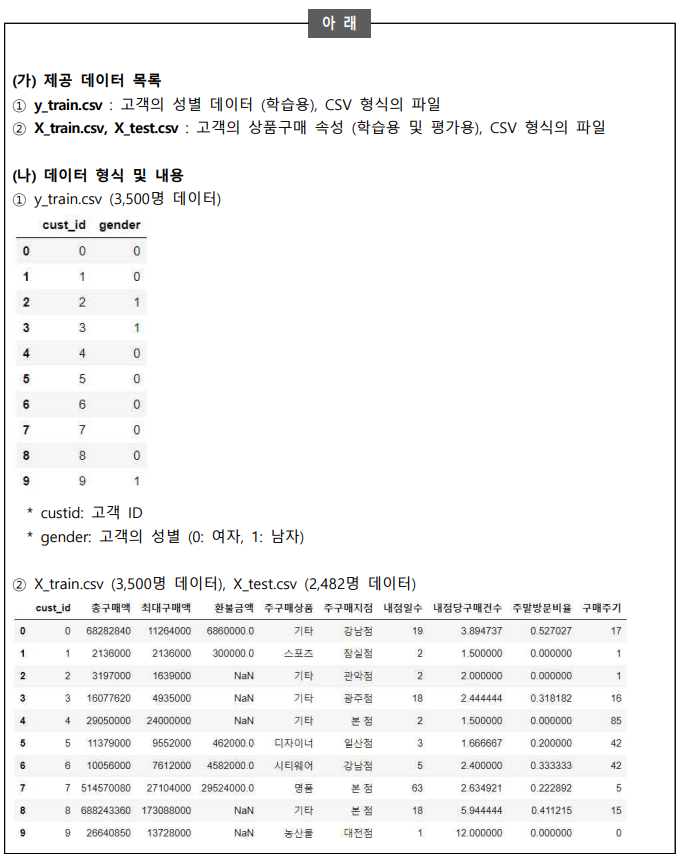

고객 3,500명에 대한 학습용 데이터(y_train.csv, X_train.csv)를 이용하여 성별예측 모형을 만든 후, 이를 평가용 데이터(X_test.csv)에 적용하여 얻은 2,482명 고객의 성별 예측값(남자일 확률)을 다음과 같은 형식의 csv 파일로 생성하시오. (제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

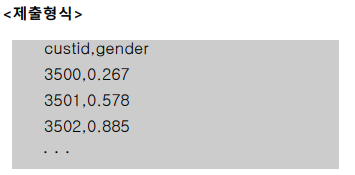

유의 사항

성능이 우수한 예측 모형을 구축하기 위해서는 적절한 데이터 전처리, Feature Engineering, 분류 알고리즘 사용, 초매개변수 최적화, 모형 앙상블 등이 수반되어야 한다.

### 3-02.데이터 불러오기, 탐색

***pandas의 출력 설정 옵션 다시 확인하세요!***

In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd

# 데이타가 많은 경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
pd.set_option('display.max_rows',500)    #출력할 max row를 지정
pd.set_option('display.max_columns',20)  #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 2자리까지
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# 다음의 파일과 encoding 방식을 사용한다
#  'bigdata/X_train.csv', encoding='cp949' 
#  'bigdata/y_train.csv', encoding='cp949'
#  'bigdata/X_test.csv', encoding='cp949'

In [ ]:
# [1] 학습 데이터 X_train.csv 가져오기
X = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/X_train.csv', encoding='cp949')
print(X.head(2))

   cust_id      총구매액     최대구매액       환불금액 주구매상품 주구매지점  내점일수  내점당구매건수  주말방문비율  \
0        0  68282840  11264000 6860000.00    기타   강남점    19     3.89    0.53   
1        1   2136000   2136000  300000.00   스포츠   잠실점     2     1.50    0.00   

   구매주기  
0    17  
1     1  


In [ ]:
# [2] 학습 데이터 y_train.csv 가져오기
Y = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/y_train.csv')
print(Y.head(2))

   cust_id  gender
0        0       0
1        1       0


In [ ]:
# [3] 제출용 데이터 X_test.csv 가져오기
X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/X_test.csv', encoding='cp949')
print(X_submission.head(2))

   cust_id       총구매액     최대구매액        환불금액 주구매상품 주구매지점  내점일수  내점당구매건수  \
0     3500   70900400  22000000  4050000.00    골프  부산본점    13     1.46   
1     3501  310533100  38558000 48034700.00   농산물   잠실점    90     2.43   

   주말방문비율  구매주기  
0    0.79    26  
1    0.37     3  


### 3-03.데이터전처리

In [ ]:
# [4] X, X_submission에 동일한 전처리를 위해 두 데이터 결합하여 
# dfX로 이름 붙이기
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
print(dfX.head(2))

   cust_id      총구매액     최대구매액       환불금액 주구매상품 주구매지점  내점일수  내점당구매건수  주말방문비율  \
0        0  68282840  11264000 6860000.00    기타   강남점    19     3.89    0.53   
1        1   2136000   2136000  300000.00   스포츠   잠실점     2     1.50    0.00   

   구매주기  
0    17  
1     1  


In [ ]:
# [5] 각 컬럼의 dtype 및 행, 열 개수 확인
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  5982 non-null   int64  
 1   총구매액     5982 non-null   int64  
 2   최대구매액    5982 non-null   int64  
 3   환불금액     2076 non-null   float64
 4   주구매상품    5982 non-null   object 
 5   주구매지점    5982 non-null   object 
 6   내점일수     5982 non-null   int64  
 7   내점당구매건수  5982 non-null   float64
 8   주말방문비율   5982 non-null   float64
 9   구매주기     5982 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 467.5+ KB


In [ ]:
# 이때! 문제지와 잘 비교해서 틀린 정보가 없는지 확인해야 합니다.

In [ ]:
# [6] dfX의 컬럼별 결측치 확인하기
print(dfX.isna().sum())

cust_id       0
총구매액          0
최대구매액         0
환불금액       3906
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64


In [ ]:
# [7] 결측치를 채우기 위한 값 선정을 위한 작업
# 주구매상품별로 환불금액 평균이 다름을 확인
print(dfX.groupby('주구매상품')['환불금액'].mean())

주구매상품
가공식품     20808626.17
가구       14528750.00
건강식품     14169266.67
골프       34571470.96
구두        2521238.46
기타       18435255.97
남성 캐주얼    5945761.54
남성 트랜디   56525100.00
남성정장     19246020.00
농산물      23008905.17
대형가전     87600400.00
디자이너     63414337.81
란제리/내의   11311320.00
명품       37613435.05
모피/피혁    23014196.43
보석        3200000.00
생활잡화      6528000.00
섬유잡화      5305093.33
셔츠        3202311.11
소형가전             NaN
수산품       7737105.56
스포츠      13091245.59
시티웨어     20180252.92
식기       23526500.00
아동       28994933.33
악기               NaN
액세서리      6888000.00
육류       16213347.06
일용잡화      7951950.00
젓갈/반찬    18102380.00
주류           5600.00
주방가전     64396006.67
주방용품      6944425.00
차/커피     10604838.89
축산가공      8948509.23
침구/수예    23816300.00
캐주얼      27376871.43
커리어      16950966.67
통신/컴퓨터           NaN
트래디셔널    18687438.89
피혁잡화      3321309.09
화장품      20854978.80
Name: 환불금액, dtype: float64


In [ ]:
# [8] '주구매상품'별 '환불금액' 평균으로 '환불금액'의 결측치를 채우기 한다
# 채우기 한 뒤 '환불금액'으로 추가한다. 
s = dfX.groupby('주구매상품')['환불금액'].transform('mean')
dfX['환불금액'] = dfX['환불금액'].mask(dfX['환불금액'].isna(), s)

In [ ]:
# [9] '환불금액' 컬럼의 결측치 행을 확인해 본다
dfX[dfX['환불금액'].isna()]

cust_id       총구매액      최대구매액  환불금액   주구매상품 주구매지점  내점일수  내점당구매건수  \
1021     1021    3190800    2494800   NaN  통신/컴퓨터  영등포점     2     1.50   
1521     1521     178000     178000   NaN    소형가전  본  점     1     1.00   
1712     1712    4578000    3948000   NaN  통신/컴퓨터   잠실점     2     1.00   
2035     2035     260000     260000   NaN    소형가전   잠실점     1     1.00   
3003     3003    5850000    4200000   NaN      악기   잠실점     2     1.00   
3256     3256   39100000   39100000   NaN  통신/컴퓨터   울산점     1     1.00   
3434     3434     898000     836000   NaN      악기   광주점     2     1.50   
3764     3764    5006320    3718000   NaN  통신/컴퓨터  부산본점     2     1.00   
3960     3960    5013000    5013000   NaN  통신/컴퓨터  본  점     1     1.00   
5450     5450    2256000    2256000   NaN  통신/컴퓨터  본  점     1     1.00   
5937     5937  365230000  164700000   NaN      악기  영등포점     4     1.75   

      주말방문비율  구매주기  
1021    0.67    61  
1521    1.00     0  
1712    0.50     0  
2035    0.00     0  
3003    0.50     5  
3256    0.00     0  
3434    0.67    88  
3764    1.00     0  
3960    1.00     0  
5450    1.00     0  
5937    0.43    64

In [ ]:
# [10] '주구매상품'별 평균을 구할 수 없는 경우 '환불금액'을 '환불금액'의 평균으로 채우기 합니다.
# 채우기 후에 채우기가 잘 적용되었는지 확인합니다.
dfX['환불금액'] = dfX['환불금액'].fillna(dfX['환불금액'].mean())
print(dfX.isna().sum().sum())

0


- 상관관계가 높은 X1, X2가 있다면 제거 : -1 또는 1에 가까운 것은 좋지 않음

In [ ]:
# [11] dfX에서 높은 상관계수 확인하기 (X Feature간)
print(dfX.corr())

         cust_id  총구매액  최대구매액  환불금액  내점일수  내점당구매건수  주말방문비율  구매주기
cust_id     1.00  0.02   0.02  0.01 -0.00    -0.01   -0.02 -0.00
총구매액        0.02  1.00   0.68  0.38  0.65     0.11    0.02 -0.21
최대구매액       0.02  0.68   1.00  0.37  0.36     0.03    0.02 -0.11
환불금액        0.01  0.38   0.37  1.00  0.24    -0.03   -0.02 -0.08
내점일수       -0.00  0.65   0.36  0.24  1.00     0.23   -0.00 -0.30
내점당구매건수    -0.01  0.11   0.03 -0.03  0.23     1.00    0.01 -0.08
주말방문비율     -0.02  0.02   0.02 -0.02 -0.00     0.01    1.00 -0.01
구매주기       -0.00 -0.21  -0.11 -0.08 -0.30    -0.08   -0.01  1.00


In [ ]:
# [12] Y 값의 분포 확인
temp = Y['gender'].value_counts(normalize=True).sort_index()
print(temp)

0   0.62
1   0.38
Name: gender, dtype: float64


In [ ]:
# [13] dfX.loc[:3500,:], Y를 병합(merge)하여 temp를 만들어 사용
dfXY = pd.merge(dfX.loc[:3500,:], Y)
print(dfXY.head(3))

   cust_id      총구매액     최대구매액       환불금액   주구매상품 주구매지점  내점일수  내점당구매건수  \
0        0  68282840  11264000 6860000.00      기타   강남점    19     3.89   
1        1   2136000   2136000  300000.00     스포츠   잠실점     2     1.50   
2        2   3197000   1639000 5945761.54  남성 캐주얼   관악점     2     2.00   

   주말방문비율  구매주기  gender  
0    0.53    17       0  
1    0.00     1       0  
2    0.00     1       1  


In [ ]:
# [14] '주구매지점', '주구매상품'에 대해 Label Encoding을 실행한다
# 항목별 순서 개념이 없는 경우
dfX['주구매지점'] = dfX['주구매지점'].astype('category').cat.codes
dfX['주구매상품'] = dfX['주구매상품'].astype('category').cat.codes

In [ ]:
# [15] 최종 데이터 점검
# 결측치 확인, 데이터타입 확인(수치형)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  5982 non-null   int64  
 1   총구매액     5982 non-null   int64  
 2   최대구매액    5982 non-null   int64  
 3   환불금액     5982 non-null   float64
 4   주구매상품    5982 non-null   int8   
 5   주구매지점    5982 non-null   int8   
 6   내점일수     5982 non-null   int64  
 7   내점당구매건수  5982 non-null   float64
 8   주말방문비율   5982 non-null   float64
 9   구매주기     5982 non-null   int64  
dtypes: float64(3), int64(5), int8(2)
memory usage: 385.7 KB


### 3-04.데이터 분리, 모델 생성 및 학습

In [ ]:
# [16] 사용할 도구 import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# [17] train score, test score, roc_auc_score 를 반환하는 함수 작성
from sklearn.metrics import roc_auc_score
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)  
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

In [ ]:
# [18] 다양한 모델을 만들고 성능을 출력하는 함수 작성
def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier().fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

In [ ]:
# [19] X를 train 용도, submission 용도로 나누고, Y를 1차원으로 바꿈 (MinMaxScaler 적용)
def get_data(dfX, Y):
    X = dfX.drop(columns=['cust_id'])
    X_use = X.iloc[:3500, :]
    X_submission = X.iloc[3500:, :]
    Y1 = Y['gender']
    scaler = StandardScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, Y1.shape, X1_submission.shape)
    return X1_use, X1_submission, Y1

***make_models() 함수는 제출하기 전에 주석을 취해 주시기 바랍니다!***
- 시간이 오래 걸려서요!! 

In [ ]:
# [20] dfX, Y 사용 

# X, Y 분리하기
X1_use, X1_submission, Y1 = get_data(dfX, Y)

# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1_use, Y1, 
                                                test_size = 0.25,
                                                stratify=Y1, random_state=0)
# 다양한 모델 만들어 보기
make_models(xtrain1, xtest1, ytrain1, ytest1)

(3500, 9) (3500,) (2482, 9)
model1 0.6312 0.6446 0.6560
model2 1 1.0000 0.5691 0.5394
model2 2 0.7939 0.6080 0.5560
model2 3 0.7916 0.6034 0.5765
model2 4 0.7482 0.6263 0.5979
model2 5 0.7413 0.6263 0.6068
model2 6 0.7162 0.6240 0.6035
model2 7 0.7196 0.6126 0.6059
model2 8 0.7147 0.6274 0.6183
model2 9 0.7086 0.6297 0.6204
model3 1.0000 0.5634 0.5378
model3 3 0.6518 0.6594 0.6708
model3 4 0.6598 0.6469 0.6660
model3 5 0.6728 0.6354 0.6545
model3 6 0.6800 0.6343 0.6478
model3 7 0.6964 0.6263 0.6424
model4 1.0000 0.6560 0.6699
model4 3 0.6590 0.6423 0.6808
model4 4 0.6792 0.6526 0.6886
model4 5 0.6990 0.6583 0.6946
model4 6 0.7307 0.6571 0.6943
model4 7 0.7611 0.6651 0.6910
model5 0.7139 0.6857 0.7017


In [ ]:
# [26] train, test의 r2_score가 가까우면서, roc_auc 성능 좋은 모델 선택
# model3 3 0.6518 0.6594 0.6708   #  이정도요 
model = DecisionTreeClassifier(max_depth=3, random_state=0).fit(xtrain1, ytrain1)
print('final model', get_scores(model, xtrain1, xtest1, ytrain1, ytest1))

### 3-05.제출할 데이터 생성

In [ ]:
# [27] X_submission 으로 cust_id와 예측한 남자일 확률을 파일로 저장하기
submission = pd.DataFrame({'cust_id': X_submission['cust_id'],
                           'gender' : model.predict_proba(X1_submission)[:, 1]})
submission.to_csv('submission.csv', index=False)

In [ ]:
# [28] 파일 읽어 출력해 보기
temp = pd.read_csv('submission.csv')
temp.head(2)

cust_id  gender
0     3500    0.46
1     3501    0.18

### 3-06.시험보러 가서는 이렇게!

***탐색적 데이터 분석 없이 필수 작업만으로 구성해서, 위의 작업을 한꺼번에 작성해 보기:***

In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
pd.set_option('display.max_rows',500)    #출력할 max row를 지정
pd.set_option('display.max_columns',20)  #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

# [1] 학습 데이터 X_train.csv 가져오기
X = pd.read_csv('bigdata/X_train.csv', encoding='cp949')
#print(X.head(2))

# [2] 학습 데이터 y_train.csv 가져오기
Y = pd.read_csv('bigdata/y_train.csv')
#print(Y.head(2))

# [3] 제출용 데이터 X_test.csv 가져오기
X_submission = pd.read_csv('bigdata/X_test.csv', encoding='cp949')
#print(X_submission.head(2))

# [4] X, X_submission에 동일한 전처리를 위해 두 데이터 결합하여 
# dfX로 이름 붙이기
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
#print(dfX.head(2))

# [5] 각 컬럼의 dtype 및 행, 열 개수 확인
# dfX.info()

# [6] dfX의 컬럼별 결측치 확인하기
# print(dfX.isna().sum())

# [7] 결측치가 있는 '환불금액'을 '환불금액'의 평균으로 채우기 합니다.
# 앞의 예제와 다른 결츨치 처리를 했어요. (간단한 버전)
# 채우기 후에 채우기가 잘 적용되었는지 확인합니다.
dfX['환불금액'] = dfX['환불금액'].fillna(dfX['환불금액'].mean())
#print(dfX.isna().sum().sum())

# [8] '주구매지점', '주구매상품'에 대해 Label Encoding을 실행한다
# 항목별 순서 개념이 없는 경우
dfX['주구매지점'] = dfX['주구매지점'].astype('category').cat.codes
dfX['주구매상품'] = dfX['주구매상품'].astype('category').cat.codes

# [9] train score, test score, roc_auc_score 를 반환하는 함수 작성
from sklearn.metrics import roc_auc_score
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)  
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

# [10] 다양한 모델을 만들고 성능을 출력하는 함수 작성
def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier().fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

# [11] X를 train 용도, submission 용도로 나누고, Y를 1차원으로 바꿈 (MinMaxScaler 적용)
def get_data(dfX, Y):
    X = dfX.drop(columns=['cust_id'])
    X_use = X.iloc[:3500, :]
    X_submission = X.iloc[3500:, :]
    Y1 = Y['gender']
    scaler = StandardScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, Y1.shape, X1_submission.shape)
    return X1_use, X1_submission, Y1


# [12] dfX, Y 사용 

# X, Y 분리하기
X1_use, X1_submission, Y1 = get_data(dfX, Y)

# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1_use, Y1, 
                                                test_size = 0.25,
                                                stratify=Y1, random_state=0)
# 다양한 모델 만들어 보기 - 수행 후 꼭 주석!
#make_models(xtrain1, xtest1, ytrain1, ytest1)

# [13] train, test의 r2_score가 가까우면서, roc_auc 성능 좋은 모델 선택
model = DecisionTreeClassifier(max_depth=3, random_state=0).fit(xtrain1, ytrain1)
print('final model', get_scores(model, xtrain1, xtest1, ytrain1, ytest1))

# [14] X_submission 으로 cust_id와 예측한 남자일 확률을 파일로 저장하기
submission = pd.DataFrame({'cust_id': X_submission['cust_id'],
                           'gender': model.predict_proba(X1_submission)[:, 1]})
submission.to_csv('submission.csv', index=False)

# [15] 파일 읽어 출력해 보기
temp = pd.read_csv('submission.csv')
temp.head(2)

(3500, 9) (3500,) (2482, 9)
final model 0.6781 0.6537 0.6795


cust_id  gender
0     3500  0.4154
1     3501  0.1997

### 3-07.함수 사용 없이 작업하기

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
pd.set_option('display.max_rows',500)    #출력할 max row를 지정
pd.set_option('display.max_columns',20)  #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

# [1] 학습 데이터 X_train.csv 가져오기
X = pd.read_csv('bigdata/X_train.csv', encoding='cp949')
#print(X.head(2))

# [2] 학습 데이터 y_train.csv 가져오기
Y = pd.read_csv('bigdata/y_train.csv')
#print(Y.head(2))

# [3] 제출용 데이터 X_test.csv 가져오기
X_submission = pd.read_csv('bigdata/X_test.csv', encoding='cp949')
#print(X_submission.head(2))

# [4] X, X_submission에 동일한 전처리를 위해 두 데이터 결합하여 
# dfX로 이름 붙이기
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
#print(dfX.head(2))

# [5] 각 컬럼의 dtype 및 행, 열 개수 확인
# dfX.info()

# [6] dfX의 컬럼별 결측치 확인하기
# print(dfX.isna().sum())

# [7] 결측치가 있는 '환불금액'을 '환불금액'의 평균으로 채우기 합니다.
# 앞의 예제와 다른 결츨치 처리를 했어요. (간단한 버전)
# 채우기 후에 채우기가 잘 적용되었는지 확인합니다.
dfX['환불금액'] = dfX['환불금액'].fillna(dfX['환불금액'].mean())
#print(dfX.isna().sum().sum())

# [8] '주구매지점', '주구매상품'에 대해 Label Encoding을 실행한다
# 항목별 순서 개념이 없는 경우
dfX['주구매지점'] = dfX['주구매지점'].astype('category').cat.codes
dfX['주구매상품'] = dfX['주구매상품'].astype('category').cat.codes

# [10] train score, test score, roc_auc_score 를 반환하는 함수 작성
# 이 함수는 문제에서 원하는 평가지표가 무엇인지에 따라 만들어 주시면 됩니다.
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)  
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

# [11] dfX, Y 사용 
# dfX를 train 용도(X_use1), submission 용도(X_submission1)로 나누고, Y에서 target 변수만 Y1으로 저장
X_temp = dfX.drop(columns=['cust_id'])
X_scaled = StandardScaler().fit_transform(X_temp)
X1_use = X_scaled[:X.shape[0], :]
X1_submission = X_scaled[X.shape[0]:, :]
Y1 = Y['gender']
print(X1_use.shape, Y1.shape, X1_submission.shape)

# train, test  0.75 : 0.25 분할, stratify 적용, random_state=0 적용
xtrain, xtest, ytrain, ytest = train_test_split(X1_use, Y1, 
                                                test_size = 0.25,
                                                stratify=Y1, random_state=0)

# 다양한 모델 만들어 보기 - 수행 후 하나만 빼고 모두 주석처리하세요!
# 블록 선택 후 Ctrl + / 를 누르면 주석이 토글됩니다.  
# model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
# print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

# for k in range(1, 10):
#     model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
#     print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

# model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
# print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

# for d in range(3, 8):  # max_depth 는 성능을 보고 3 ~ 10을 사용해 보셔도 됩니다.
#     model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
#     print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))

# model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
# print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

# for d in range(3, 8):
#     model4 = RandomForestClassifier(500, max_depth=d, random_state=0).fit(xtrain, ytrain)
#     print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

# model5 = XGBClassifier(random_state=0).fit(xtrain, ytrain)
# print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

# [12] train, test의 r2_score가 가까우면서, roc_auc 성능 좋은 모델 선택
# model4 4 0.6781 0.6537 0.6795   #  이정도요
# 그리고 아래처럼 복사해서 model을 생성하고 위의 모델링한 것들은 꼭! 주석을 취합니다.
model = DecisionTreeClassifier(max_depth=3, random_state=0).fit(xtrain1, ytrain1)
#print('final model', get_scores(model, xtrain1, xtest1, ytrain1, ytest1))

# [13] X_submission 으로 cust_id와 예측한 남자일 확률을 파일로 저장하기
submission = pd.DataFrame({'cust_id': X_submission['cust_id'],
                           'gender': model.predict_proba(X1_submission)[:, 1]})
submission.to_csv('submission.csv', index=False)

# [14] 파일 읽어 출력해 보기
temp = pd.read_csv('submission.csv')
temp.head(2)

(3500, 9) (3500,) (2482, 9)
final_model 0.6781 0.6537 0.6795


cust_id  gender
0     3500  0.4154
1     3501  0.1997